# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df = merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
#merged_df["Tumor Volume (mm3)"] = round(merged_df["Tumor Volume (mm3)"], 1)
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# Checking the number of mice.
num_unique_mice = merged_df["Mouse ID"].nunique()
print(f"Number of unique mice: {num_unique_mice}")


Number of unique mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate Mice IDs:")
print(duplicate_mice["Mouse ID"].unique())


Duplicate Mice IDs:
['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = "g989"
duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == duplicate_mouse_id]
print(f"All data for mouse ID {duplicate_mouse_id}:")
duplicate_mouse_data


All data for mouse ID g989:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Drop duplicates
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

# Display the data table for preview
clean_df = clean_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [15]:
# Checking the number of mice in the clean DataFrame.

num_mice = len(clean_df["Mouse ID"].unique())
print(f"There are {num_mice} unique mice in the clean DataFrame.")


There are 249 unique mice in the clean DataFrame.


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = clean_df.groupby("Drug Regimen")

tumor_mean = drug_group["Tumor Volume (mm3)"].mean()
tumor_median = drug_group["Tumor Volume (mm3)"].median()
tumor_variance = drug_group["Tumor Volume (mm3)"].var()
tumor_stddev = drug_group["Tumor Volume (mm3)"].std()
tumor_sem = drug_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_stddev,
    "Tumor Volume Std. Err.": tumor_sem
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# Using the agg method, produce the same summary statistics in a single line
summary_stats = (clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
                 .agg(['mean', 'median', 'var', 'std', 'sem']))

# Rename the columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume (mm3)',
    'median': 'Median Tumor Volume (mm3)',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics table
summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [108]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby('Drug Regimen').agg(
    {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}
)
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

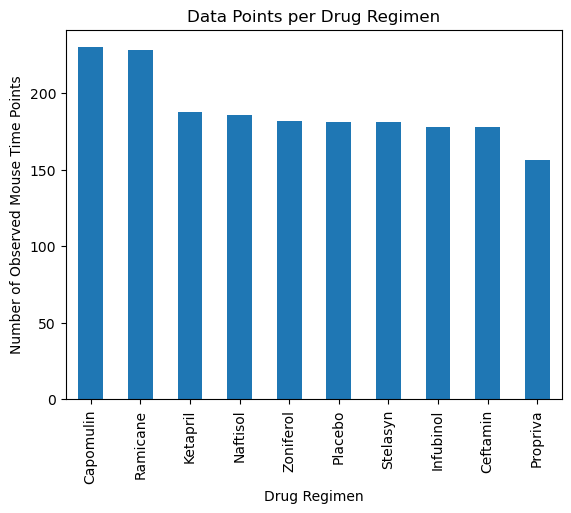

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_df['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Time Points')
plt.title('Data Points per Drug Regimen')

plt.show()


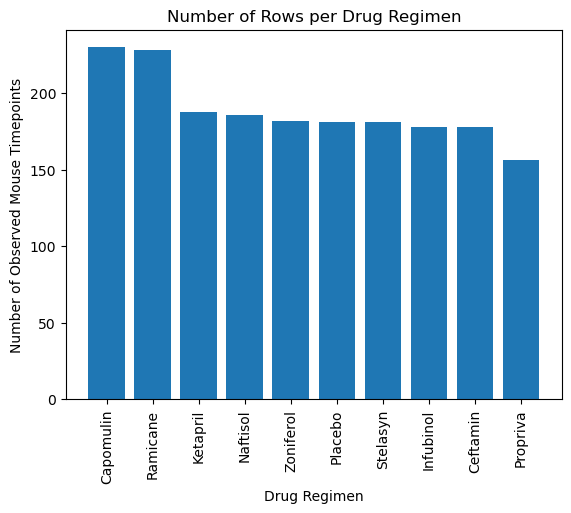

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

rows_per_regimen = clean_df['Drug Regimen'].value_counts()

plt.bar(rows_per_regimen.index, rows_per_regimen.values)
plt.xticks(rotation=90)

plt.title('Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()

Text(0, 0.5, 'Sex')

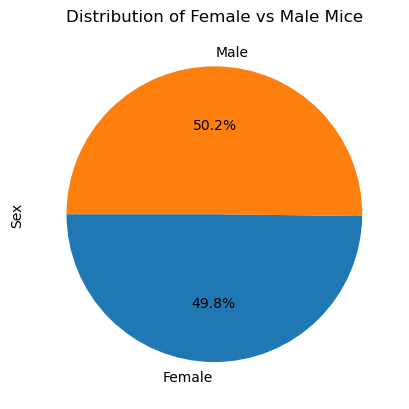

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = merged_df.groupby("Sex")["Mouse ID"].nunique()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group.plot(kind="pie", autopct="%1.1f%%", startangle=180, title="Distribution of Female vs Male Mice")

plt.ylabel('Sex')


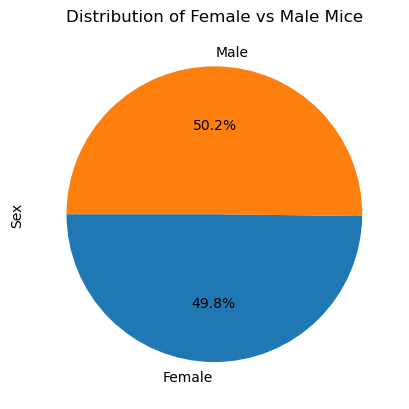

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = clean_df.groupby('Sex')['Mouse ID'].nunique()

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=180)

plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# List of four treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter data for only four treatments
filtered_df = merged_df.loc[merged_df["Drug Regimen"].isin(treatments)]

# Group by Mouse ID and find the maximum timepoint
last_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max()

# Merge the original DataFrame with the last timepoints
merged_last_timepoints = pd.merge(last_timepoints, merged_df, on=["Mouse ID", "Timepoint"], how="left")

# Display the final tumor volume for each mouse
final_tumor_volumes = merged_last_timepoints[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volumes


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment in the list
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results
    print(f"Summary statistics for {treatment}:")
    print(f"-----------------------------------")
    print(f"Lower quartile: {round(lowerq, 2)}")
    print(f"Upper quartile: {round(upperq, 2)}")
    print(f"Interquartile range: {round(iqr, 2)}")
    print(f"Median: {round(quartiles[0.5], 2)} ")
    print(f"Values below {round(lower_bound, 2)} could be outliers.")
    print(f"Values above {round(upper_bound, 2)} could be outliers.")
    if len(outliers) > 0:
        print(f"Outliers: {outliers.values}")
    else:
        print("No outliers found.")
    print(f"-----------------------------------\n")


Summary statistics for Capomulin:
-----------------------------------
Lower quartile: 37.69
Upper quartile: 45.0
Interquartile range: 7.31
Median: 41.56 
Values below 26.71 could be outliers.
Values above 55.97 could be outliers.
Outliers: [25.47214326 23.34359787]
-----------------------------------

Summary statistics for Ramicane:
-----------------------------------
Lower quartile: 36.67
Upper quartile: 45.0
Interquartile range: 8.33
Median: 40.67 
Values below 24.19 could be outliers.
Values above 57.49 could be outliers.
Outliers: [22.05012627]
-----------------------------------

Summary statistics for Infubinol:
-----------------------------------
Lower quartile: 47.31
Upper quartile: 57.31
Interquartile range: 10.0
Median: 51.82 
Values below 32.31 could be outliers.
Values above 72.32 could be outliers.
No outliers found.
-----------------------------------

Summary statistics for Ceftamin:
-----------------------------------
Lower quartile: 47.21
Upper quartile: 56.8
Interqua

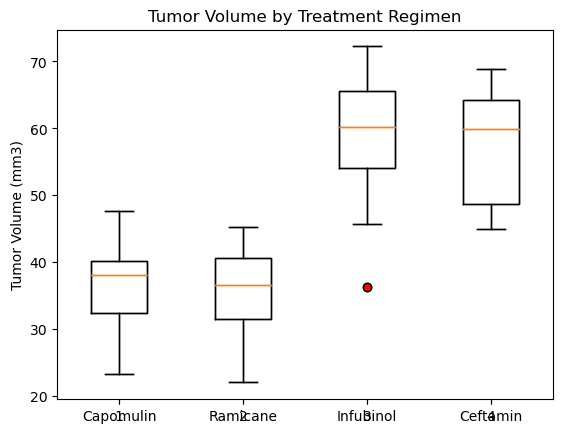

In [23]:
# Create a dataframe with the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Get the last tumor volume for each mouse
last_tumor_vol = df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
merged_df_last = pd.merge(last_tumor_vol, df, on=['Mouse ID', 'Timepoint'], how='left')

# Create a list of tumor volumes for each treatment regimen
tumor_vols = []
for treatment in treatments:
    tumor_vols.append(merged_df_last[merged_df_last['Drug Regimen'] == treatment]['Tumor Volume (mm3)'])

# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vols, flierprops=dict(markerfacecolor='red'))
ax.boxplot(tumor_vols, labels=treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume by Treatment Regimen')
plt.show()


In [83]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
